# Determining Welch hyperparameters

The goal is to write a wrapper for the Welch function as implemented in scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#r34b375daf612-1) for Pyleoclim

Let's generate a periodic signal (evenly-spaced) with periodicities of 20 and 80.

## Default behavior and testing

Text(0, 0.5, 'Value')

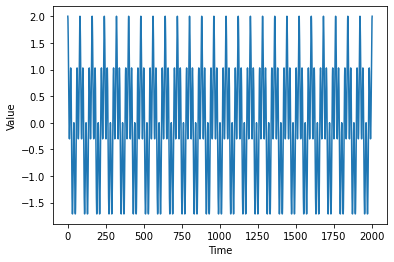

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

freqs=[1/20,1/80]
time=np.arange(2001)
signals=[]
for freq in freqs:
    signals.append(np.cos(2*np.pi*freq*time))
s=sum(signals)

#plot
plt.plot(time,s)
plt.xlabel('Time')
plt.ylabel('Value')

Use the original scipy function (default parameters) to calculate the spectrum

In [21]:
#params
fs=1.0
window='hann'
nperseg=None
noverlap=None
nfft=None
detrend='constant'
return_onesided=True
scaling='density'
axis=-1
average='mean'

<ipython-input-22-3f216d932a6a>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/f,Pxx)


(0.0, 200.0)

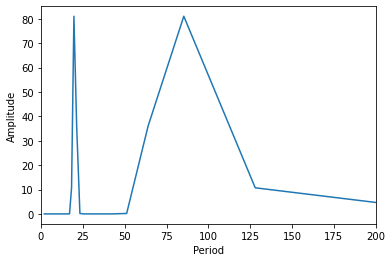

In [22]:
#function
from scipy import signal
f,Pxx=signal.welch(s,fs=fs,window=window,nperseg=nperseg,noverlap=noverlap,nfft=nfft,detrend=detrend,return_onesided=return_onesided,scaling=scaling,axis=axis,average=average)

#and plot the resulting spectrum
plt.plot(1/f,Pxx)
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0,200)

Periodogram comparison (essentially setting the nperseg to the length of the time series)

In [17]:
#params
fs=1.0
window='hann'
nperseg=len(s)
noverlap=None
nfft=None
detrend='constant'
return_onesided=True
scaling='density'
axis=-1
average='mean'

<ipython-input-18-3f216d932a6a>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/f,Pxx)


(0.0, 200.0)

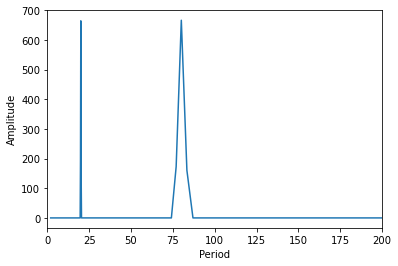

In [18]:
#function
from scipy import signal
f,Pxx=signal.welch(s,fs=fs,window=window,nperseg=nperseg,noverlap=noverlap,nfft=nfft,detrend=detrend,return_onesided=return_onesided,scaling=scaling,axis=axis,average=average)

#and plot the resulting spectrum
plt.plot(1/f,Pxx)
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0,200)

## Timeseries with only 3 cycles represented

Text(0, 0.5, 'Value')

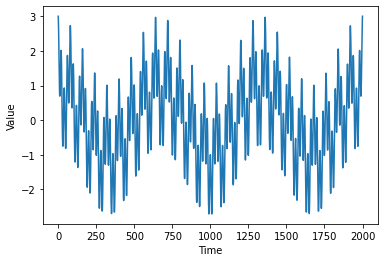

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

time=np.arange(2001)
high_per=len(time)/3
freqs=[1/20,1/80,1/high_per]
signals=[]
for freq in freqs:
    signals.append(np.cos(2*np.pi*freq*time))
s=sum(signals)

#plot
plt.plot(time,s)
plt.xlabel('Time')
plt.ylabel('Value')

Periodogram comparison (essentially setting the nperseg to the length of the time series)

In [45]:
#params
fs=1.0
window='hann'
nperseg=len(s)
noverlap=None
nfft=None
detrend='constant'
return_onesided=True
scaling='density'
axis=-1
average='mean'

<ipython-input-46-ce12ed394372>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/f,Pxx)


(0.0, 1500.0)

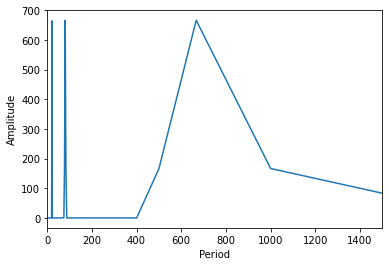

In [46]:
#function
from scipy import signal
f,Pxx=signal.welch(s,fs=fs,window=window,nperseg=nperseg,noverlap=noverlap,nfft=nfft,detrend=detrend,return_onesided=return_onesided,scaling=scaling,axis=axis,average=average)

#and plot the resulting spectrum
plt.plot(1/f,Pxx)
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0,1500)

Using the scipy defaults

In [29]:
#params
fs=1.0
window='hann'
nperseg=None
noverlap=None
nfft=None
detrend='constant'
return_onesided=True
scaling='density'
axis=-1
average='mean'

<ipython-input-30-ce12ed394372>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/f,Pxx)


(0.0, 1500.0)

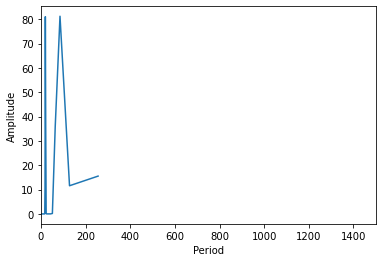

In [30]:
#function
from scipy import signal
f,Pxx=signal.welch(s,fs=fs,window=window,nperseg=nperseg,noverlap=noverlap,nfft=nfft,detrend=detrend,return_onesided=return_onesided,scaling=scaling,axis=axis,average=average)

#and plot the resulting spectrum
plt.plot(1/f,Pxx)
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0,1500)

3 segments with 50% overlap (REDFIT defaults)

In [41]:
#params
fs=1.0
window='hann'
nperseg=len(s)/2
noverlap=len(s)/4
nfft=None
detrend='constant'
return_onesided=True
scaling='density'
axis=-1
average='mean'

<ipython-input-42-ce12ed394372>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/f,Pxx)


(0.0, 1500.0)

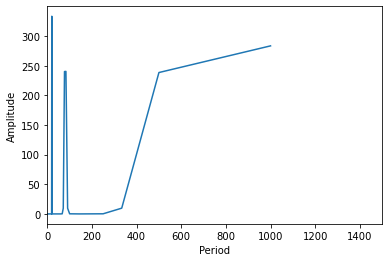

In [42]:
#function
from scipy import signal
f,Pxx=signal.welch(s,fs=fs,window=window,nperseg=nperseg,noverlap=noverlap,nfft=nfft,detrend=detrend,return_onesided=return_onesided,scaling=scaling,axis=axis,average=average)

#and plot the resulting spectrum
plt.plot(1/f,Pxx)
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0,1500)

Adding more overlap (75%)

In [33]:
#params
fs=1.0
window='hann'
nperseg=len(s)
noverlap=0.75*len(s)
nfft=None
detrend='constant'
return_onesided=True
scaling='density'
axis=-1
average='mean'

<ipython-input-34-ce12ed394372>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/f,Pxx)


(0.0, 1500.0)

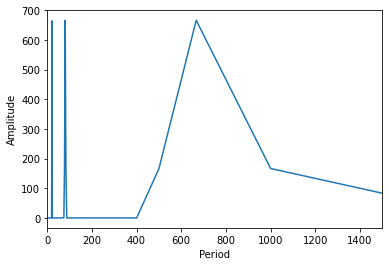

In [34]:
#function
from scipy import signal
f,Pxx=signal.welch(s,fs=fs,window=window,nperseg=nperseg,noverlap=noverlap,nfft=nfft,detrend=detrend,return_onesided=return_onesided,scaling=scaling,axis=axis,average=average)

#and plot the resulting spectrum
plt.plot(1/f,Pxx)
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0,1500)

Considering less overlap

In [35]:
#params
fs=1.0
window='hann'
nperseg=len(s)
noverlap=0.3*len(s)
nfft=None
detrend='constant'
return_onesided=True
scaling='density'
axis=-1
average='mean'

<ipython-input-36-ce12ed394372>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/f,Pxx)


(0.0, 1500.0)

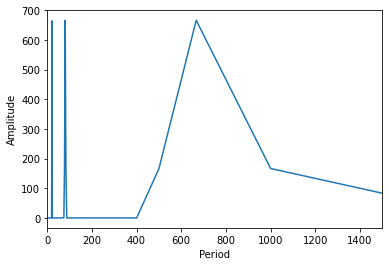

In [36]:
#function
from scipy import signal
f,Pxx=signal.welch(s,fs=fs,window=window,nperseg=nperseg,noverlap=noverlap,nfft=nfft,detrend=detrend,return_onesided=return_onesided,scaling=scaling,axis=axis,average=average)

#and plot the resulting spectrum
plt.plot(1/f,Pxx)
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0,1500)

## Various noise